Step one_RL: Define the question, hypothesis, data sources and methodology to test the hypothesis
1. Questions: a) Is there a relationship between level of employment in a State and the amount of commercial banking assets in that State? b) Is there a relationship between level of employment Nationally and the amount of commercial banking assets Nationally?
2. Hypothesis: There is a positive correlation between the level of employment in a State and Nationally and the amount of commercial banking assets in a State and Nationally.
3. Data Sources: FRED ('Federal Reserve Economic Data') for total commercial banking assets for Arizona(AZ), New York(NY), Texas(TX), Florida(FL) and Nationally(US) and for level of employment in each respective State and Nationally. Data is in CSV file format.
4. Methodology: Straight line regressions for total commercial banking assets and level of employment in each State and Nationally for men and women seperately. ANOVA test to determine if the differnce in the mean of commercial banking assets and difference in the mean of level of employment for each State and Nationally is significant. Calculate the distribution of total commercial banking assets as measured by standard deviations from the mean total commercial banking assets for all 5 States. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import numpy as np
import requests
from scipy.stats import linregress
from scipy.optimize import minimize
import scipy.stats as stats

#Import data files
AZ_Employment ="EMPLOYAZ.csv"
AZ_Assets = "AZTAST.csv"
CA_Employment = "EMPLOYCA.csv"
CA_Assets = "CATAST.csv"
FL_Employment ="EMPLOYFL.csv"
FL_Assets = "FLTAST.csv"
TX_Employment = "EMPLOYTX.csv"
TX_Assets = "TXTAST.csv"
NY_Employment = "EMPLOYNY.csv"
NY_Assets = "NYTAST.csv"
Total_Assets_US = "Total_Assets_US.csv"
Women_Employ = "Women_Employ.csv"
Men_Employ = "Men_Employ.csv"

# Read the State data
AZ_Employment = pd.read_csv(AZ_Employment)
AZ_Assets = pd.read_csv(AZ_Assets)
CA_Employment = pd.read_csv(CA_Employment)
CA_Assets = pd.read_csv(CA_Assets)
FL_Employment = pd.read_csv(FL_Employment)
FL_Assets = pd.read_csv(FL_Assets)
TX_Employment = pd.read_csv(TX_Employment)
TX_Assets = pd.read_csv(TX_Assets)
NY_Employment = pd.read_csv(NY_Employment)
NY_Assets = pd.read_csv(NY_Assets)

#Read the National data
Total_Assets_US = pd.read_csv(Total_Assets_US)
Women_Employ = pd.read_csv(Women_Employ)
Men_Employ = pd.read_csv(Men_Employ)

In [2]:
#Merge the States together into a dataset
States_List = [AZ_Employment, AZ_Assets, CA_Employment, CA_Assets, FL_Employment, FL_Assets, TX_Employment, TX_Assets, NY_Employment, NY_Assets]

States_merge = reduce(lambda left,right: pd.merge(left,right, on=['DATE'], how = 'inner'), States_List)

States_merge

,DATE,EMPLOYAZ,AZTAST,EMPLOYCA,CATAST,EMPLOYFL,FLTAST,EMPLOYTX,TXTAST,EMPLOYNY,NYTAST
0,2003-10-01,2493500,59954040,16400900,481215482,7590500,79300763,10240300,136451478,8852700,1595462417
1,2004-01-01,2526500,48952480,16407400,238540573,7663400,83252891,10252900,139942740,8809300,1649741972
2,2004-04-01,2552400,52303555,16443500,247023538,7761500,83598300,10238400,143958082,8768400,1719407226
3,2004-07-01,2587300,54849392,16519800,251607057,7876300,84439096,10258300,147233210,8813800,1622308586
4,2004-10-01,2619200,58624495,16577400,265813575,7997000,89237569,10303200,151466947,8870400,1010074345
...,...,...,...,...,...,...,...,...,...,...,...
63,2019-07-01,3350100,30967945,18668000,829080767,9971900,159226527,13522000,421325663,9165900,992381163
64,2019-10-01,3373500,31210017,18641800,843262929,10031800,159637990,13587700,427337046,9115100,1016532907
65,2020-01-01,3409600,33172435,18617800,887064433,10064600,171058455,13601700,441327746,9146200,1158796858
66,2020-04-01,3351000,36608281,17905500,946663218,9676200,195899873,13273200,485454404,8772000,1188428456


In [3]:
#Define linear regression function
def plot_linear_regression(x, y, title, y_label, annotate_pos):
    
    #Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    regression = x * slope +intercept
    
    #Equation of line
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    #Scatterplot and regression line
    plt.scatter(x,y, c="#006400")
    plt.plot(x, regression, "r")
    
    #Annotate text for line
    plt.annotate(line_eq, annotate_pos, fontsize = 12, color = "navy")
    plt.title(title)
    plt.xlabel('Level of Employment')
    plt.ylabel(y_label)
    plt.show()

    #Print R value and P value 
    print(f"R value is {rvalue}")
    print(f"P value is {pvalue}")

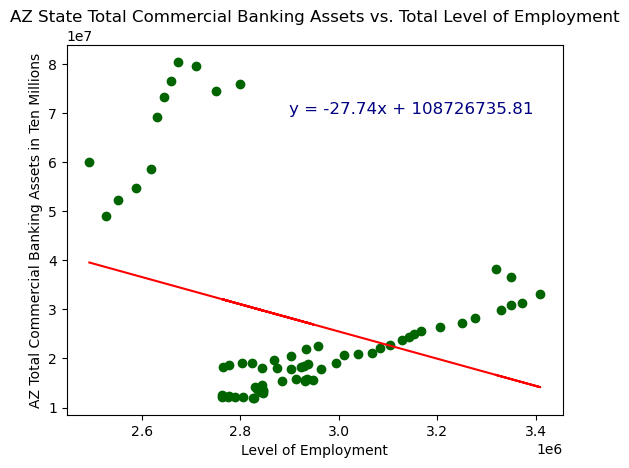

R value is -0.30311500186897294
P value is 0.011983656537610363


In [4]:
# Linear regression on AZ data
x = States_merge["EMPLOYAZ"]
y = States_merge["AZTAST"]

#Call line function
plot_linear_regression(x, y,"AZ State Total Commercial Banking Assets vs. Total Level of Employment", "AZ Total Commercial Banking Assets in Ten Millions", (2900000,70000000))

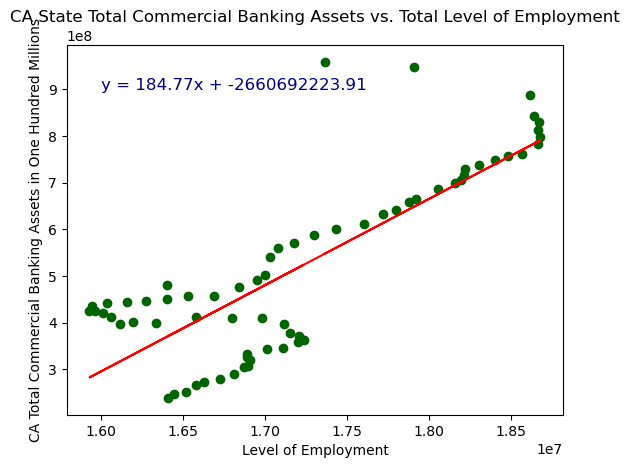

R value is 0.8001534156760312
P value is 2.704184736795247e-16


In [5]:
# Linear regression on CA data
x = States_merge["EMPLOYCA"]
y = States_merge["CATAST"]

#Call line function
plot_linear_regression(x, y,"CA State Total Commercial Banking Assets vs. Total Level of Employment", "CA Total Commercial Banking Assets in One Hundred Millions", (16000000,900000000))

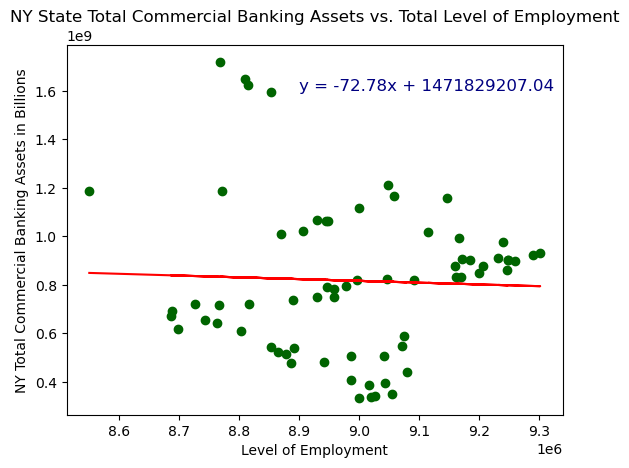

R value is -0.04012966590138515
P value is 0.7452465679249458


In [6]:
# Linear regression on NY data
x = States_merge["EMPLOYNY"]
y = States_merge["NYTAST"]

#Call line function
plot_linear_regression(x, y,"NY State Total Commercial Banking Assets vs. Total Level of Employment", "NY Total Commercial Banking Assets in Billions", (8900000,1600000000))

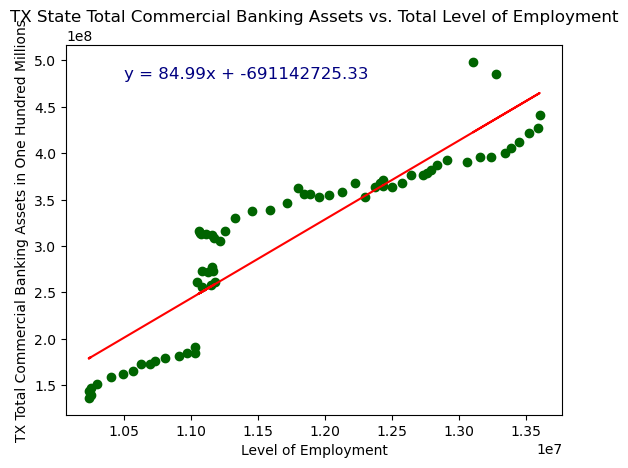

R value is 0.9121406256137612
P value is 2.9130146567754436e-27


In [7]:
# Linear regression on NY data
x = States_merge["EMPLOYTX"]
y = States_merge["TXTAST"]

#Call line function
plot_linear_regression(x, y,"TX State Total Commercial Banking Assets vs. Total Level of Employment", "TX Total Commercial Banking Assets in One Hundred Millions", (10500000,480000000))

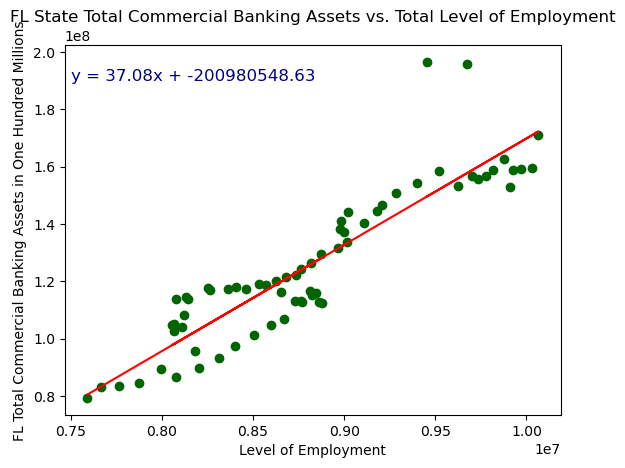

R value is 0.9051649371635826
P value is 3.237038762908953e-26


In [8]:
# Linear regression on NY data
x = States_merge["EMPLOYFL"]
y = States_merge["FLTAST"]

#Call line function
plot_linear_regression(x, y,"FL State Total Commercial Banking Assets vs. Total Level of Employment", "FL Total Commercial Banking Assets in One Hundred Millions", (7500000,190000000))

Step 2_Le: 
1) Explain that the colors represent years. Blue starts in 2003-2004 and the scatterplot ends with brown color for 2017-2020. 
2) The three States that showed a positive correlation between Commercial Banking Assets and Level of Employment were CA, TX, and FL and all demonstrate that assets and employment increased over time. 
3) The two States that did not show a positive correlation were AZ and NY. Both scatterplots show that Commercial Banking Assets were highest in the years preceding the 'Great Recession' that occurred in 2008/2009. 
4) Last point: Neither NY or AZ appear to have recovered to the level of Commercial Banking Assets report in 2003/2004.

In [9]:
# Define Color Scatter by Years
def color_scatter(df, col1, col2, indicator, bins, title, y_label):
    
    # creating labels out of bins list
    labels = []
    for i in range(len(bins)-1):
        labels.append(f"{bins[i]}-{bins[i+1]-1}")
    
    df_year = df.copy()
    yr = indicator.astype(int)
    df_year['labels'] = pd.cut(yr, bins, labels=labels, include_lowest=True)
    
    #Scatterplot and regression line
    groups = df_year.groupby('labels')
    for name, group in groups:
        plt.plot(group[col1], group[col2], marker='o', linestyle='', markersize=8, label=name)

    plt.title(title)
    plt.xlabel('Level of Employment')
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [10]:
years_bins = [2003,2005, 2008, 2011, 2014, 2017, 2021]
date_col = pd.to_datetime(States_merge['DATE'])

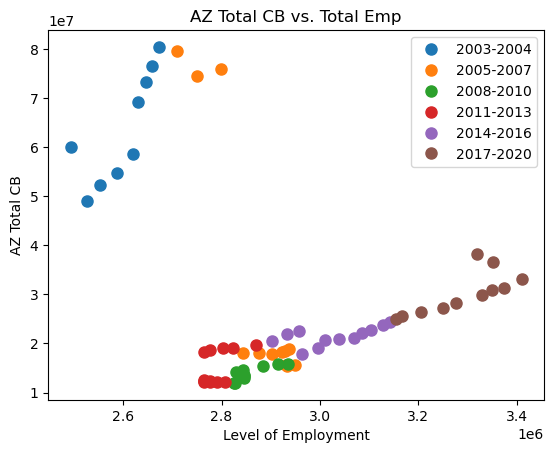

In [11]:
# colored acatter plot for AZ data
color_scatter(States_merge, 'EMPLOYAZ', 'AZTAST',date_col.dt.year, years_bins,"AZ Total CB vs. Total Emp", "AZ Total CB" )

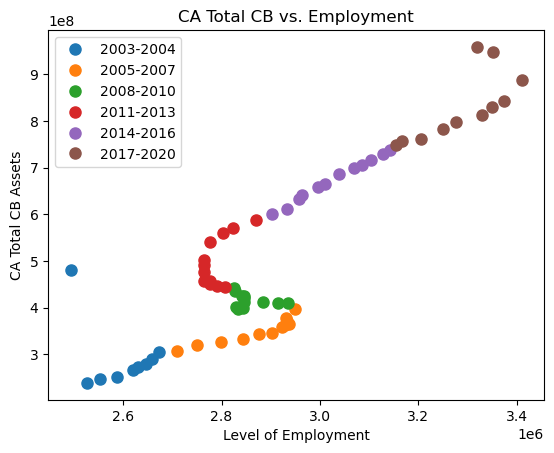

In [12]:
# colored acatter plot for CA data
color_scatter(States_merge, 'EMPLOYAZ', 'CATAST', date_col.dt.year, years_bins,"CA Total CB vs. Employment", "CA Total CB Assets")

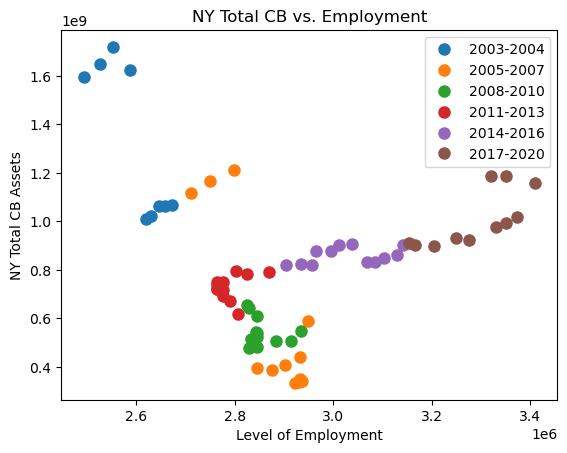

In [13]:
# colored acatter plot for NY data
color_scatter(States_merge, 'EMPLOYAZ', 'NYTAST', date_col.dt.year, years_bins,"NY Total CB vs. Employment", "NY Total CB Assets")

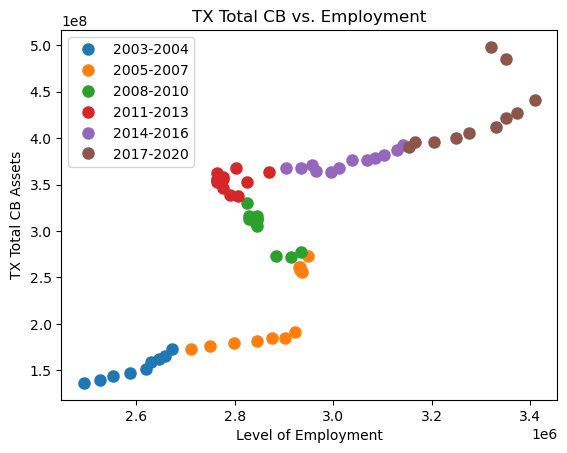

In [14]:
# colored acatter plot for TX data
color_scatter(States_merge, 'EMPLOYAZ', 'TXTAST', date_col.dt.year, years_bins,"TX Total CB vs. Employment", "TX Total CB Assets")

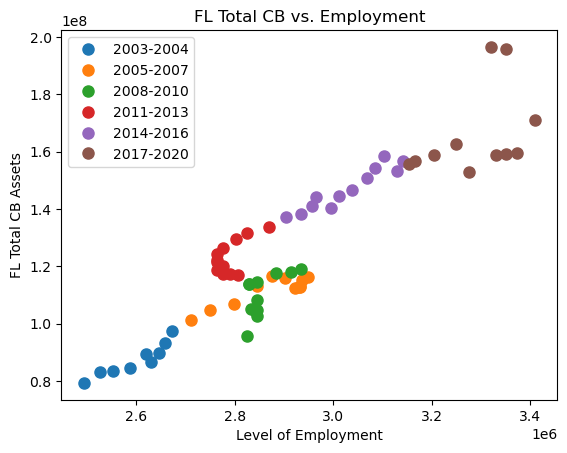

In [15]:
# colored acatter plot for FL data
color_scatter(States_merge, 'EMPLOYAZ', 'FLTAST', date_col.dt.year, years_bins,"FL Total CB vs. Employment", "FL Total CB Assets")

Step 3_Josef: 
1) Lead with regression: Regressing National Level Commercial Banking Assets against National Level of Employment for Women and seperately for Men. 
2) The regression shows that their is a positive correlation between commercial banking assets and level of Employment for Men and Women. The results are statistically significant as demonstrated by the P Values for each regression.
3) Furthermore, the colorful scatterplot shows that commercial banking assets and level of employment have increased over time.
4) The National regression results support the hypothesis.

In [16]:
#Merge the National Data together into a dataset
National_List = [Total_Assets_US, Women_Employ, Men_Employ]

National_merge = reduce(lambda left,right: pd.merge(left,right, on=['DATE'], how = 'inner'), National_List)

#National_merge

In [17]:
#Rename columns in National dataset
National_merge.rename(columns ={"TLAACBW027SBOG":"COMM BANKING ASSETS:US", "LNS12000002":"EMPLOYMENT WOMEN:US", "LNS12000001":"EMPLOYMENT MEN:US"},inplace=True)

National_merge

,DATE,COMM BANKING ASSETS:US,EMPLOYMENT WOMEN:US,EMPLOYMENT MEN:US
0,1973-08-01,764.6927,32828,52376
1,1974-05-01,841.6085,33726,53165
2,1975-01-01,887.2367,33660,51967
3,1975-10-01,906.4436,34372,51998
4,1976-09-01,952.3437,35774,53399
...,...,...,...,...
81,2021-09-01,22028.6766,72294,81573
82,2021-12-01,22603.0749,73501,82580
83,2022-06-01,22718.9232,74031,84026
84,2023-02-01,23052.3260,75049,85266


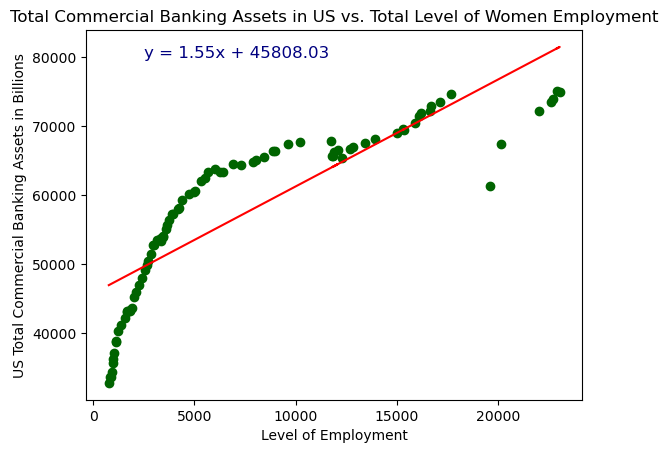

R value is 0.8479553849024549
P value is 7.112282210276378e-25


In [18]:
# Linear regression on National Women data
x = National_merge["COMM BANKING ASSETS:US"]
y = National_merge["EMPLOYMENT WOMEN:US"]

#Call line function
plot_linear_regression(x, y,"Total Commercial Banking Assets in US vs. Total Level of Women Employment", "US Total Commercial Banking Assets in Billions", (2500,80000))

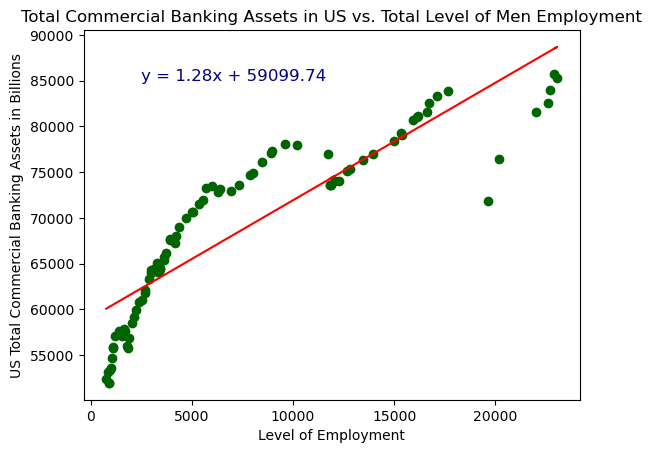

R value is 0.8856907705348259
P value is 9.977534423848985e-30


In [19]:
# Linear regression on National Men data
x = National_merge["COMM BANKING ASSETS:US"]
y = National_merge["EMPLOYMENT MEN:US"]

#Call line function
plot_linear_regression(x, y,"Total Commercial Banking Assets in US vs. Total Level of Men Employment", "US Total Commercial Banking Assets in Billions", (2500,85000))

In [20]:
#Create National Bins for Color Scatter Plots
national_bins = [1973, 1975, 1978, 1981, 1984, 1987,
                 1990, 1993, 1996, 1999, 2002, 2005, 
                 2008, 2011, 2014, 2017, 2020, 2024]
national_bins = [1973, 1978, 1984, 1990, 1996, 2002, 
                 2008, 2014, 2020, 2024]
national_date_col = pd.to_datetime(National_merge['DATE'])

In [21]:
national_bins = [1973, 2003,2005, 2008, 2011, 2014, 2017, 2021]
national_date_col = pd.to_datetime(National_merge['DATE'])

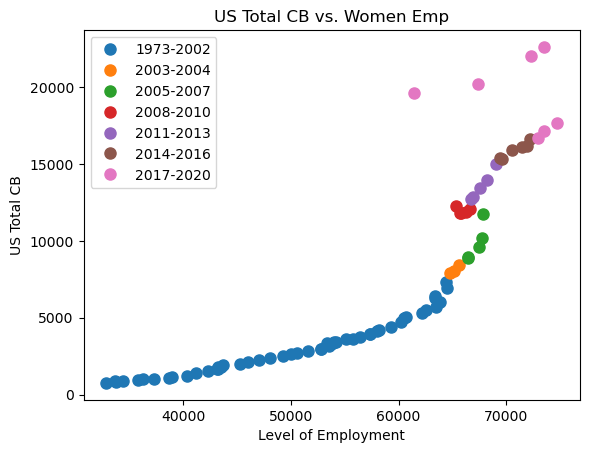

In [22]:
# colored acatter plot for US data
color_scatter(National_merge, 'EMPLOYMENT WOMEN:US', 'COMM BANKING ASSETS:US', national_date_col.dt.year, national_bins,"US Total CB vs. Women Emp", "US Total CB" )

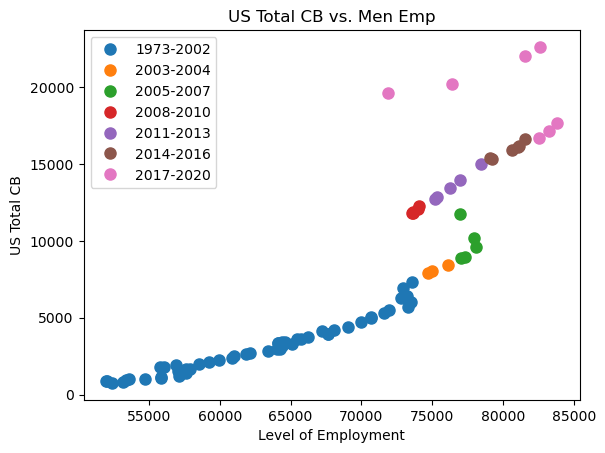

In [23]:
# colored acatter plot for US data
color_scatter(National_merge, 'EMPLOYMENT MEN:US', 'COMM BANKING ASSETS:US', national_date_col.dt.year, national_bins,"US Total CB vs. Men Emp", "US Total CB" )

Step 4_Hamid:
1) Box plots were created for all 5 States and measured Commercial Banking Assets and Level of Employment.
2) The Commercial Banking Assets box plot shows that NY had the greatest amount of assets while AZ had the least amount of assets. 
3) The Employment Level box plot shows that CA has the highest level of employment and AZ has the lowest level of employment. Furthermore, the ranges of the level of employment for the 3 States that showed positve correlations between commercial banking assets and level of employment show similar ranges. 
4) ANOVA tests on the means of each State for Commercial Banking Assets and Level of Employment showed that the differences between the means is statistically significant. 

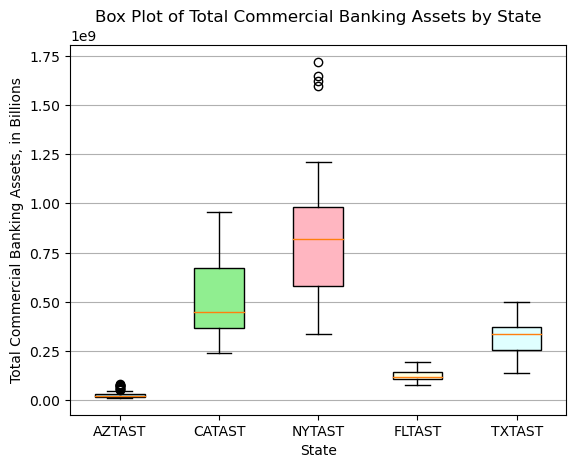

In [24]:
# Create box plot for total Commercial Banking Assets by State

# Select the columns for box plot
columns = ['AZTAST', 'CATAST', 'NYTAST', 'FLTAST', 'TXTAST']

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot
boxplot = ax.boxplot(States_merge[columns], patch_artist=True)

# Add color to the box plot
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add gridlines
ax.yaxis.grid(True)
    
# Set x-axis tick labels
ax.set_xticklabels(columns)

# Set y-axis label
ax.set_ylabel('Total Commercial Banking Assets, in Billions')
ax.set_xlabel('State')

# Set title
ax.set_title('Box Plot of Total Commercial Banking Assets by State')

# Show the plot
plt.show()

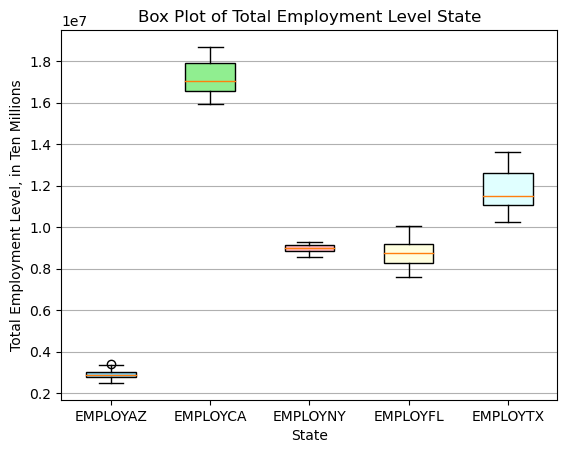

In [25]:
# Create box plot for total Employment Level by State

# Select the columns for box plot
columns = ['EMPLOYAZ', 'EMPLOYCA', 'EMPLOYNY', 'EMPLOYFL', 'EMPLOYTX']

# Create a figure and axes
fig, ax = plt.subplots()

# Create the box plot
boxplot = ax.boxplot(States_merge[columns], patch_artist=True)

# Add color to the box plot
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add gridlines
ax.yaxis.grid(True)
    
# Set x-axis tick labels
ax.set_xticklabels(columns)

# Set y-axis label
ax.set_ylabel('Total Employment Level, in Ten Millions')
ax.set_xlabel('State')

# Set title
ax.set_title('Box Plot of Total Employment Level State')

# Show the plot
plt.show()

In [26]:
# Perform the ANOVA on the mean of States Commercial Banking Assets
stats.f_oneway(States_merge['AZTAST'], States_merge['CATAST'],States_merge['NYTAST'],States_merge['TXTAST'],
               States_merge['FLTAST'])

F_onewayResult(statistic=234.84896316886048, pvalue=7.972398638419603e-96)

In [27]:
# Perform the ANOVA on the mean of States Level of Employment
stats.f_oneway(States_merge['EMPLOYAZ'], States_merge['EMPLOYCA'],States_merge['EMPLOYNY'],States_merge['EMPLOYTX'],
               States_merge['EMPLOYFL'])

F_onewayResult(statistic=4176.631224579706, pvalue=2.4286698682337373e-284)

Step 5_Stephanie:
1) We compared the amount Commercial Banking Assets calculated as Percentage of Employment for each State. 
2) The resulting bar graph shows that AZ State appears to be an outlier compared to the other four States.
3) We proceeded to the next step to calculate the standard deviations for each State and compare them in distribution.

In [28]:
# Calculate Total Commercial Banking Assets as a Percentage of Employment by State

# Initialize lists to store the calculated employment-assets values
AZ_avg = []
CA_avg = []
NY_avg = []
TX_avg = []
FL_avg = []
    
# Create loop to iterate over each row in the DataFrame 
for index, row in States_merge.iterrows():
    
    # Get the values for Employment and Assets columns for each State
    employaz = row['EMPLOYAZ']
    aztast = row['AZTAST']
    employca = row['EMPLOYCA']
    catast = row['CATAST']
    employny = row['EMPLOYNY']
    nytast = row['NYTAST']
    employtx = row['EMPLOYTX']
    txtast = row['TXTAST']
    employfl = row['EMPLOYFL']
    fltast = row['FLTAST']
    
    # Calculate the percentage for each State
    AZ =((employaz / aztast) * 100)
    CA =((employca / catast) * 100)
    NY =((employny / nytast) * 100)
    TX =((employtx / txtast) * 100)
    FL =((employfl / fltast) * 100)
    
    #Append to the lists
    AZ_avg.append(AZ)
    CA_avg.append(CA)
    NY_avg.append(NY)
    TX_avg.append(TX)
    FL_avg.append(FL)
    
#Calculate the mean of each list for each State
AZ_avg_ratio = sum(AZ_avg)/len(AZ_avg)
CA_avg_ratio = sum(CA_avg)/len(CA_avg)
NY_avg_ratio = sum(NY_avg)/len(NY_avg)
TX_avg_ratio = sum(TX_avg)/len(TX_avg)
FL_avg_ratio = sum(FL_avg)/len(FL_avg)
    
print(AZ_avg_ratio, CA_avg_ratio, NY_avg_ratio, TX_avg_ratio, FL_avg_ratio)

14.324937422729402 3.7688771561621497 1.278945990295245 4.180495276076385 7.233005547912626


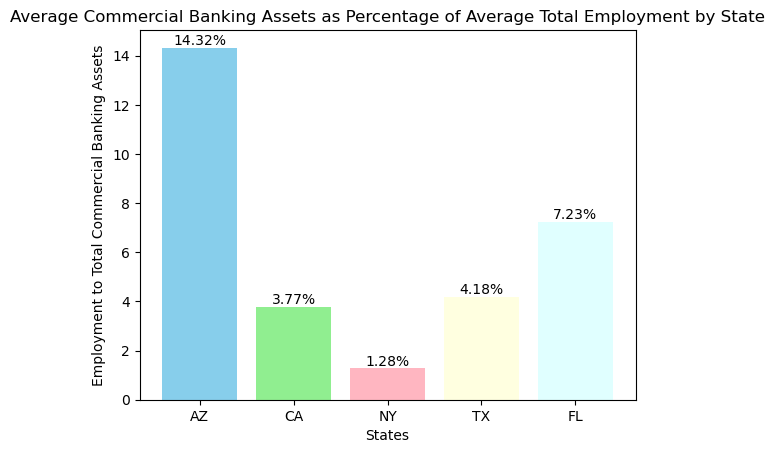

In [29]:
# Create Bar Chart for State Ratios

#Data for chart
States = ['AZ', 'CA', 'NY', 'TX', 'FL']
Ratios = [AZ_avg_ratio, CA_avg_ratio, NY_avg_ratio, TX_avg_ratio, FL_avg_ratio]


#Different colors for each State
colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan']

#Create bar chart
plt.bar(States, Ratios, color=colors)

plt.title('Average Commercial Banking Assets as Percentage of Average Total Employment by State')
plt.xlabel('States')
plt.ylabel('Employment to Total Commercial Banking Assets')

# Add ratio values to each bar
for x, ratio in enumerate(Ratios):
    plt.text(x, ratio, f'{ratio:.2f}%', ha='center', va='bottom')

plt.show()

Step 6_Milli:
1) We first merged the State and Federal data and then calculated the means and the standard deviations for each State's Commercial Banking Assets and Level of Employment.
2) We then created a bell curve to show the distribution of the mean Commercial Banking Assets of each State compared the mean for all 5 States. 
3) The distribution shows that the three States that report a positve correlation between Commercial Banking Assets and Level of Employment (CA, TX & FL) all were within 2 standard deviations of the mean. 
4) The two States that did not report positive correlations were AZ and NY: AZ was close to 3 standard deviations from the mean and NY was not on the bell curve (reminder: NY reported nearly a 0% R value).

Conclusion:
1) In conclusion, our study found support for our hypothesis that Commercial Banking Assets and Level of Employment are postively correlated in 3 out of 5 States and in the National data. 

In [30]:
#Merge State and National dataframes
Combined_List = [AZ_Employment, AZ_Assets, CA_Employment, CA_Assets, FL_Employment, FL_Assets, TX_Employment, TX_Assets, NY_Employment, NY_Assets, Total_Assets_US, Women_Employ, Men_Employ]

Combined_merge = reduce(lambda left,right: pd.merge(left,right, on=['DATE'], how = 'inner'), Combined_List)

#Rename National data columns
Combined_merge.rename(columns ={"TLAACBW027SBOG":"COMM BANKING ASSETS:US", "LNS12000002":"EMPLOYMENT WOMEN:US", "LNS12000001":"EMPLOYMENT MEN:US"},inplace=True)

#Convert Commercial Banking Assets: US  column to Billions
Combined_merge['COMM BANKING ASSETS:US']=Combined_merge['COMM BANKING ASSETS:US']*1000000

Combined_merge

,DATE,EMPLOYAZ,AZTAST,EMPLOYCA,CATAST,EMPLOYFL,FLTAST,EMPLOYTX,TXTAST,EMPLOYNY,NYTAST,COMM BANKING ASSETS:US,EMPLOYMENT WOMEN:US,EMPLOYMENT MEN:US
0,2003-10-01,2493500,59954040,16400900,481215482,7590500,79300763,10240300,136451478,8852700,1595462417,7.312831e+09,64387,73597
1,2008-10-01,2948500,15654080,17112800,397036349,8654300,116362572,11166300,273427327,9074200,590640470,1.173766e+10,67863,76940
2,2009-04-01,2914000,15767473,16795700,410485242,8408500,117824946,11124400,272247693,9041800,507453249,1.207027e+10,66635,74021
3,2009-07-01,2883900,15331545,16577700,412916051,8253000,117502853,11081700,273056829,8987100,508253187,1.189301e+10,66286,73615
4,2014-01-01,2776300,18650256,17031000,539922939,8818200,126415485,12123900,358365535,8958400,749355513,1.394604e+10,68215,76935
5,2014-10-01,2869200,19594295,17297900,587863945,9017500,133561137,12374700,363521555,8946300,791274900,1.499591e+10,69003,78424
6,2015-04-01,2933600,21963225,17602100,610354297,8974400,138334523,12420000,367677610,9046200,825130869,1.536447e+10,69417,79093
7,2015-07-01,2957300,22552279,17716500,632692819,8980100,141162734,12435100,371529601,9091900,821026316,1.531375e+10,69579,79251
8,2020-01-01,3409600,33172435,18617800,887064433,10064600,171058455,13601700,441327746,9146200,1158796858,1.767366e+10,74720,83823
9,2020-04-01,3351000,36608281,17905500,946663218,9676200,195899873,13273200,485454404,8772000,1188428456,1.961879e+10,61408,71850


In [31]:
#Means of States and National Data
All_means = Combined_merge.mean()

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_2697/519114864.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  All_means = Combined_merge.mean()


In [32]:
#Mean of Commercial Bankings Assets of Group of States
State_Means_Assets =All_means[['AZTAST','CATAST','FLTAST','TXTAST','NYTAST']]
State_Means_Assets.mean()

408377732.4

In [33]:
#Standard Deviation of Commercial Banking Assets of Group of States
Std_States_Assets =Combined_merge[['AZTAST','CATAST','FLTAST','TXTAST','NYTAST']]
Std_States_Assets=Std_States_Assets.std()
Std_States_Assets.std()

135932623.1746716

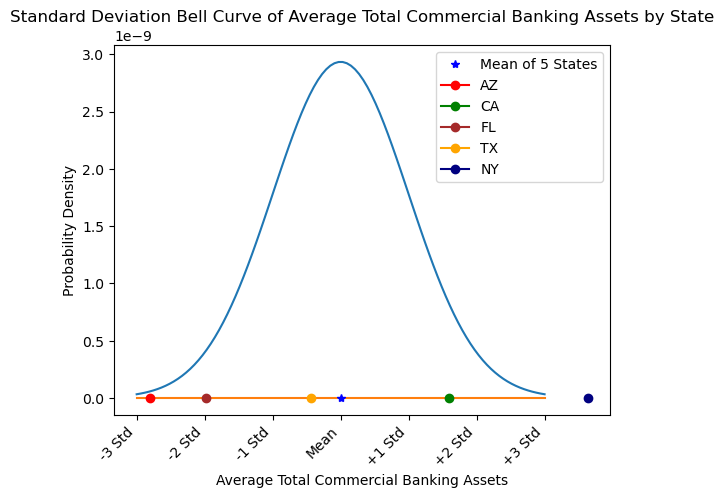

In [34]:
# Generate data for the bell curve
mean = State_Means_Assets.mean()  # Mean of the distribution
std_dev = Std_States_Assets.std()  # Standard deviation of the distribution

# Set X and Y values
x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)  # x-axis values
y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)  # y-axis values
y_0 = x*0

# Set columns
columns = {
    mean-3*std_dev: '-3 Std',
    mean-2*std_dev: '-2 Std',
    mean-1*std_dev: '-1 Std',
    mean: 'Mean',
    mean+3*std_dev: '+3 Std',
    mean+2*std_dev: '+2 Std',
    mean+1*std_dev: '+1 Std',
}
    
# Create the plot
plt.plot(x, y)
plt.plot(x,y_0)

#plot State averages
plt.plot(mean, 0, '*', color = 'blue', label='Mean of 5 States') #mean
plt.plot(State_Means_Assets['AZTAST'],0, marker ='o', color = 'red', label ='AZ')  #AZ
plt.plot(State_Means_Assets['CATAST'],0, marker ='o', color= 'green', label ='CA') #CA
plt.plot(State_Means_Assets['FLTAST'],0, marker ='o', color= 'brown', label ='FL') #FL
plt.plot(State_Means_Assets['TXTAST'],0, marker ='o', color= 'orange', label = 'TX') #TX
plt.plot(State_Means_Assets['NYTAST'],0, marker ='o', color= 'navy', label = 'NY') #NY

# Set x-axis label
plt.xlabel('Average Total Commercial Banking Assets')

# Set ticks
plt.xticks(list(columns.keys()), list(columns.values()), rotation=45, ha='right')

# Set y-axis label
plt.ylabel('Probability Density')

# Set title
plt.title('Standard Deviation Bell Curve of Average Total Commercial Banking Assets by State')

#Show the legend
plt.legend()

# Show the plot
plt.show()